# Computational Physics Lab 6

In [3]:
from scipy import integrate
import matplotlib.pylab as plt
import math
import cmath
import numpy as np
% matplotlib inline

## Newman Excercise 5.12

All matter with temperature greater than absolute zero gives off thermal radiation.  The Planck theory of thermal radiation tells us that a black body of unit area radiates electromagnetically an amount of thermal energy per second.  Newman gives us that this is equal to $I(\omega),d \omega$, where $$I(\omega) = \frac{\hbar}{4\pi^2c^2}  \frac{\omega^3}{(e^\frac{\hbar \omega}{k_B T} - 1)}$$
Using this information we can find that the total rate at which energy is radiated by a black body per unit area is $$ W = \frac{k^4_B T^4}{4\pi^2 c^2 \hbar^3} \int_{0}^{\infty} \frac{x^3}{e^x -1}$$

In [4]:
def f(x):
    '''This function computes a an equation that is one part in solving for the rate at which energy is radiated from
    a large body.
    
    Input(s):
    x = the variable in the integral
    
    Output(s):
    The value of the equation evaluated at x.'''
    
    return math.exp(-x)*x*x*x/(1-math.exp(-x))  # Had to rearange the equation by mutliplying the numerator and denominator by
                                                # e to the -x so that x cubed would not get too larg too quickly.


Plancks = 6.62607004*10**-34 # kg m^2 s^-1
h_bar = Plancks/(2*math.pi) # kg m^2 s^-1
Boltz = 1.38064852*10**-23 # m^2 kg s^-2 K^-1
c = 3.00*10**8 # m/s
N = 100
a = 10**-8
b = np.inf
T = 5778 # Temperature of the sun in Kelvin


constant = ((Boltz**4)*T**4)/(4*(math.pi)**2*c**2*h_bar**3)
integral, error = integrate.quad(f, a, b)
print("Total rate at which energy is radiated from the sun: ", constant*integral)
print("The error of this calculation is: ", error*constant)
print("The Stefan-Boltzmann constant is: ", constant*integral/T**4)

Total rate at which energy is radiated from the sun:  63113200.02842408
The error of this calculation is:  0.025545544574065705
The Stefan-Boltzmann constant is:  5.662523934769154e-08


## Newman Exercise 5.19

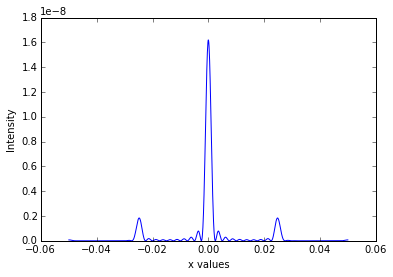

In [13]:
def q(u):
    ''' This function calculates and returns the transmission function.
    
    Input(s):
    u = distance from the central axis
    
    Output(s)
    Returns the transmission function at position u'''
    alpha = math.pi/2e-5
    return (math.sin(alpha*u)**2)

def integrand(u,x):
    
    '''This function computes the intensity of the diffraction pattern produced by a grating with 10 slits.
    
    Input(s):
    u = distance from central axis
    x = distance from central axis
    
    Output(s):
    part1 = The calculation of the square root of q(u)
    part2 = The calculation of the remaining terms in the integral.'''
    
    
    lamb = 500e-9 
    f = 1 # meters
    part1 = math.sqrt(q(u))
    part2 = cmath.exp(1j*2*math.pi*x*u/(lamb*f))
    
    return (part1*part2)
    

w = 2e-4 # meters
I = []
x_axis = np.linspace(-0.05,0.05,1000)

a = -w/2
b = w/2
N = 1000


def simpson(func, x, N, a, b):
    '''This function calculates the integral using the Simpson method of approximation.
    
    Input(s):
    func = the function to be integrated
    x = the distance from the central axis
    N = the number of steps, which must be even when using the Simpson method of approximation
    a = the leftmost point of the function to be integrated
    b = the rightmost point of the function to be integrated
    
    Output(s):
    s = the final sum of the area under the curve (ie the value of the integral
    '''
      
    h = (b - a)/N
    s = func(a, x) + func(b, x)

    for i in range (int (N / 2)):
        s += 4*func(a + (2*i - 1) * h, x)
        s += 2*func(a + 2*i * h, x) 
            
    s = s*h/3
    return s

for i in x_axis:
   
    s = (simpson(integrand, i, N, a, b))
        
    I.append(abs(s)**2)
   
    
plt.plot(x_axis,I)
plt.xlabel("x values")
plt.ylabel("Intensity")

The above plot shows the intensity of light emitted by a diffraction pattern which is produced by a grating with ten slits.  The wavelength of the light is 500 nm.  The light is incident on a diffraction grating with a total width 2e-5 meters.  It has a transmission profile of $q(u) = sin^2(\alpha u)$.  The light gets diffracted and is focused with a lense with a focal length of 1 meter.  The light then falls on a screen.  The peaks seen in the above graph show where the intensity is greatest.  This is where the light is brightest. These are the points where there is constructive interference between the light sources.  The lowest points on the graph show where there is destructive interference.  These are the darkest spots.  

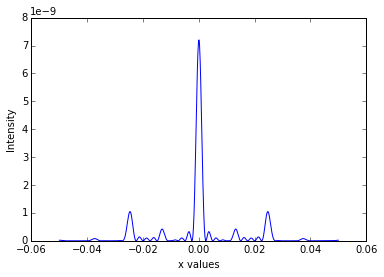

In [14]:
def q(u):
    ''' This function calculates and returns the transmission function.
    
    Input(s):
    u = distance from the central axis

    Output(s)
    Returns the transmission function at position u'''
    
    alpha = math.pi/2e-5
    
    return (math.sin(alpha*u)**2*math.sin(alpha/2*u)**2)

I2 = []

for i in x_axis:
   
    s = (simpson(integrand, i, N, a, b))
        
    I2.append(abs(s)**2)
       
plt.plot(x_axis,I2)
plt.xlabel("x values")
plt.ylabel("Intensity")

This plot shows the intensity pattern with a different transmission function.  This plot is made with a transmission function of $q(u) = sin^2(\alpha u)sin^2(\beta u)$  Other than the change in the transmission function, all other variables were kept the same.  In comparision to the first graph, this graph has a smaller magnitude, and more high points.  In particular, between the +/- 0.02 and 0.04 x points, there are high points in this plot that are not found in the previous one.